# 간단문제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 프레임 연결

In [2]:
df1=pd.DataFrame({'a':[1,2,3,4],
                 'b':[5,6,7,8],
                 'c':[9,10,11,12]},
                index=[0,1,2,3])
df2=pd.DataFrame({'a':[1,2,3,4],
                 'b':[5,6,7,8],
                 'c':[9,10,11,12],
                 'd':[1,2,3,4]},
                index=[4,5,6,7])
#위 두 데이터프레임을 열방향으로 이어 붙이듯 연결하되, 공통된 열끼리만 이어 붙이세요!

In [10]:
pd.concat([df1,df2],join='inner')

,a,b,c
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12
4,1,5,9
5,2,6,10
6,3,7,11
7,4,8,12


# 중복데이터 제거

In [11]:
df3=pd.DataFrame({'c1':['a','a','b','a','b'],
                 'c2':[1,1,1,2,2],
                 'c3':[1,1,2,2,2]})
#데이터 프레임에서 c2,c3열을 기준으로 중복행 제거하세요

In [15]:
df3.drop_duplicates(['c2','c3'])

,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


# 구간분할

In [36]:
df=pd.read_csv('./auto-mpg.csv') #파일 가져와주세요!
df.columns=['mpg', 'cylinders','displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

In [49]:
#Horsepower ? 결측치를 바꾸고 제거하여라 또한 형태를 변환하여라
#이 예제에서 horsepower 열은 엔진출력을 나타냅니다. 
#구간을 3개의 구간으로 나누는 새로운 열을 만들고 count하시오, ['low'=100이상, 'mid'=140이상, 'high'=150이상] 
#hig,low,mid 순으로 Dataframe을 만드시오

In [38]:
# hp 결측치 제거 (100 미만 , ?)
idx_hp = df[(df['horsepower'] == '?')].index
df = df.drop(idx_hp)

df['horsepower'] = df['horsepower'].astype('float')
idx_hp = df[(df['horsepower'] < 100)].index
df = df.drop(idx_hp)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [48]:
# hp에 따라 분류하기
hp = df['horsepower'].values
hp_list = []
for x in hp:
    if x >= 150:
        hp_list.append('high') 
    elif x >= 140:
        hp_list.append('mid') 
    else:
        hp_list.append('low') 

df['hp_classification'] = hp_list
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_classification
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,high
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,high
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,high
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,mid
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,high
...,...,...,...,...,...,...,...,...,...,...
361,24.2,6,146.0,120.0,2930.0,13.8,81,3,datsun 810 maxima,low
362,22.4,6,231.0,110.0,3415.0,15.8,81,1,buick century,low
363,26.6,8,350.0,105.0,3725.0,19.0,81,1,oldsmobile cutlass ls,low
385,25.0,6,181.0,110.0,2945.0,16.4,82,1,buick century limited,low


In [54]:
# df 나누기
df_high = df[(df['hp_classification'] == 'high')]
df_mid = df[(df['hp_classification'] == 'mid')]
df_low = df[(df['hp_classification'] == 'low')]

In [55]:
df_high

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_classification
22,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002,low
32,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin,low
33,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom,low
34,17.0,6,250.0,100.0,3329.0,15.5,71,1,chevrolet chevelle malibu,low
36,18.0,6,232.0,100.0,3288.0,15.5,71,1,amc matador,low
...,...,...,...,...,...,...,...,...,...,...
361,24.2,6,146.0,120.0,2930.0,13.8,81,3,datsun 810 maxima,low
362,22.4,6,231.0,110.0,3415.0,15.8,81,1,buick century,low
363,26.6,8,350.0,105.0,3725.0,19.0,81,1,oldsmobile cutlass ls,low
385,25.0,6,181.0,110.0,2945.0,16.4,82,1,buick century limited,low


In [56]:
df_high

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_classification
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,high
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,high
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,high
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,high
5,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,high
...,...,...,...,...,...,...,...,...,...,...
229,15.5,8,350.0,170.0,4165.0,11.4,77,1,chevrolet monte carlo landau,high
230,15.5,8,400.0,190.0,4325.0,12.2,77,1,chrysler cordoba,high
262,17.7,6,231.0,165.0,3445.0,13.4,78,1,buick regal sport coupe (turbo),high
288,16.9,8,350.0,155.0,4360.0,14.9,79,1,buick estate wagon (sw),high


In [57]:
df_low

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_classification
22,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002,low
32,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin,low
33,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom,low
34,17.0,6,250.0,100.0,3329.0,15.5,71,1,chevrolet chevelle malibu,low
36,18.0,6,232.0,100.0,3288.0,15.5,71,1,amc matador,low
...,...,...,...,...,...,...,...,...,...,...
361,24.2,6,146.0,120.0,2930.0,13.8,81,3,datsun 810 maxima,low
362,22.4,6,231.0,110.0,3415.0,15.8,81,1,buick century,low
363,26.6,8,350.0,105.0,3725.0,19.0,81,1,oldsmobile cutlass ls,low
385,25.0,6,181.0,110.0,2945.0,16.4,82,1,buick century limited,low


# 간단 시각화

In [89]:
#axe객체를 이용해 화면을 3분할 해주세요
#ax1에는 단변수의 데이터 분포를 확인하는 seaborn distplot()함수를 이용해 df['mpg']열의 분포를 확인해주세요
#ax2에는 [구간분할]에서 분할한 열을 활용해 출력별 mpg를 막대그래프로 나타내주세요!
#ax3에는 위와 마찬가지로 [구간분할]에서 분할한 열을 활용해 출력별 mpg를 박스플롯으로 나타내주세요

<IPython.core.display.Javascript object>


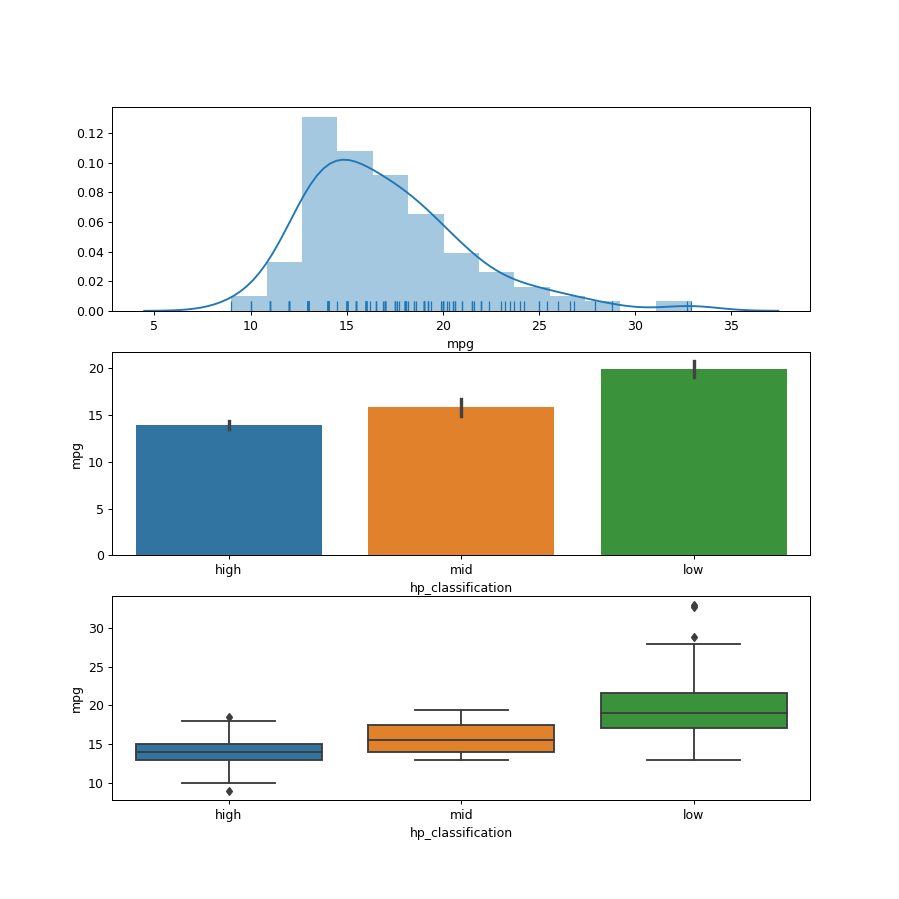

In [124]:
import matplotlib
fig = plt.figure(figsize=(10,10))

In [125]:
ax1 = fig.add_subplot(3,1,1)
sns.distplot(df['mpg'],rug = True, kde = True)
ax2 = fig.add_subplot(3,1,2)
sns.barplot(x="hp_classification",y="mpg",data=df)
ax3 = fig.add_subplot(3,1,3)
sns.boxplot(x="hp_classification",y="mpg",data=df)